Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [82]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


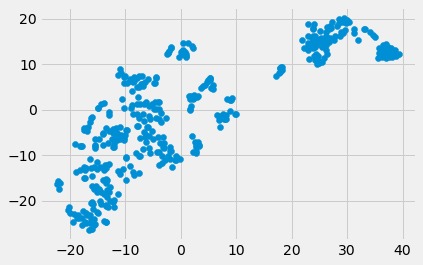

In [83]:
plt.style.use('fivethirtyeight')

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

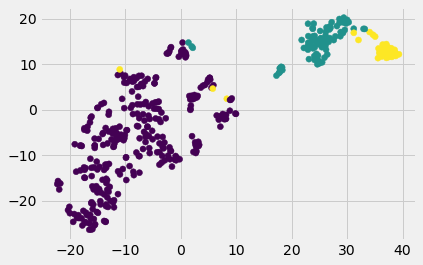

In [97]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [85]:
print(labels_train)
print(labels_train.size)

[1 0 0 2 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 2 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 0 0 2 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 2 1 0 0 0 0 1 0 0
 2 0 0 1 1 1 0 0 1 2 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 1 1 0
 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 2 0 0 1 0 0 2
 0 2 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 2 0 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 2 0 0 0 2 0 2
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 2 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 2 0 0 0 0 0 0 1 0 1 0 1 0 0 2 0 0 0 0 0 0 0 0 2 2]
404


In [91]:
def claster_data(data, datas_labels, n):
    temp_data = data.copy(deep=True)
    i = 0
    temp_data.reset_index(inplace=True)
    for i in range(data.shape[0]):
        if datas_labels[i] != n:
            temp_data.drop(i, axis=0, inplace=True)
    print(f'Размер {n} кластера {temp_data.shape}')
    return temp_data

In [92]:
X_train_0 = claster_data(X_train, labels_train, 0)
X_train_1 = claster_data(X_train, labels_train, 1)
X_train_2 = claster_data(X_train, labels_train, 2)

Размер 0 кластера (297, 14)
Размер 1 кластера (76, 14)
Размер 2 кластера (31, 14)


In [94]:
X_list = [X_train_0, X_train_1, X_train_2]
i=0
for x_ in X_list:
    criminal = x_['CRIM'].mean()
    print(f'Среднее значение "CRIM" кластера {i} = {criminal}')
    i+=1

Среднее значение "CRIM" кластера 0 = 0.40486282828282844
Среднее значение "CRIM" кластера 1 = 11.745661842105266
Среднее значение "CRIM" кластера 2 = 14.360380322580648


*Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [99]:
labels_test = kmeans.fit_predict(X_test)

print(labels_test)

[0 0 1 0 1 0 0 0 1 0 0 0 2 0 0 1 0 1 0 1 0 0 0 0 1 1 0 2 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 1 0
 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 2 0 0 1 0 1 2 2 2 0 0]


In [100]:
X_test_0 = claster_data(X_test, labels_test, 0)
X_test_1 = claster_data(X_test, labels_test, 1)
X_test_2 = claster_data(X_test, labels_test, 2)

Размер 0 кластера (69, 14)
Размер 1 кластера (26, 14)
Размер 2 кластера (7, 14)


In [103]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [104]:
X_list_ = [X_test_0, X_test_1, X_test_2]
i=0
for x_ in X_list_:
    criminal = x_['CRIM'].mean()
    print(f'Среднее значение "CRIM" кластера {i} = {criminal}')
    i+=1

Среднее значение "CRIM" кластера 0 = 0.2464211594202899
Среднее значение "CRIM" кластера 1 = 8.469301923076923
Среднее значение "CRIM" кластера 2 = 19.021665714285714


In [107]:
print(y_test.size)

102


In [115]:
def claster_target(targ, datas_labels, n):
#    temp_data = data.copy(deep=True)
    temp_y = []
    i = 0
#    temp_data.reset_index(inplace=True)
    for i in range(targ.size):
        if datas_labels[i] == n:
            temp_y.append(targ[i])
    temp_y = np.array(temp_y)
    print(f'Размер массива целевой переменной кластера {n} равен {temp_y.size}')
    return temp_y

In [117]:
y_test_0 = claster_target(y_test, labels_test, 0)
y_test_1 = claster_target(y_test, labels_test, 1)
y_test_2 = claster_target(y_test, labels_test, 2)

Размер массива целевой переменной кластера 0 равен 69
Размер массива целевой переменной кластера 1 равен 26
Размер массива целевой переменной кластера 2 равен 7


In [120]:
y_list = [y_test_0, y_test_1, y_test_2]
i=0
for y_ in y_list:
    clast_price = y_.mean()
    print(f'Среднее значение "price" кластера {i} = {clast_price}')
    i+=1

Среднее значение "price" кластера 0 = 23.91159420289855
Среднее значение "price" кластера 1 = 17.392307692307693
Среднее значение "price" кластера 2 = 12.814285714285713
